In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../projeto03_boilerplate-medical-data-visualizer/medical_examination.csv')

In [3]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
## Questão 01
value_overweight = []

for weight, height in zip(df['weight'], df['height']):
	BMI = weight / ((height / 100)**2)
	if BMI > 25:
		x = 1
	else:
		x = 0
	value_overweight.append(x)


df["overweight"] = value_overweight

print(df["overweight"])

print(df) ## Base de dados atualizada com a coluna overwheight

In [5]:
df['cholesterol'] = df['cholesterol'].apply(lambda value: 0 if value == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda value: 0 if value == 1 else 1)


In [6]:
df_cat = pd.melt(df, 
                 id_vars=['cardio'],  # Incluímos 'cardio' como uma das colunas que não será derretida
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                 var_name='variable', 
                 value_name='value')



In [7]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')

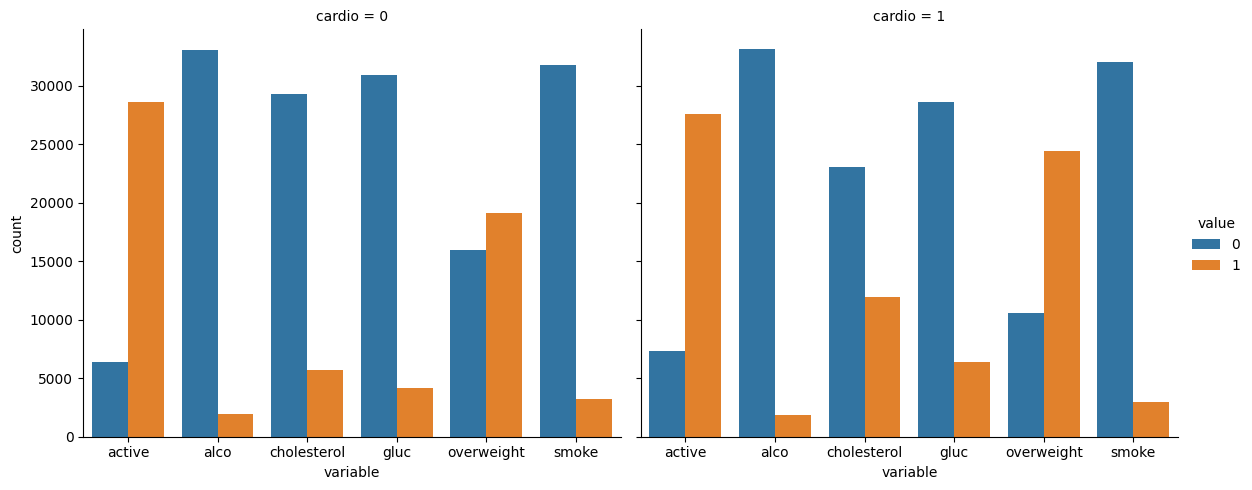

In [8]:
catplot = sns.catplot(
    x='variable',       # Eixo X: as características categóricas ('cholesterol', 'gluc', etc.)
    y='count',
    hue='value',        # Dividir por valor (0 ou 1)
    col='cardio',       # Separar os gráficos com base na condição cardíaca ('cardio')
    data=df_cat, # O DataFrame reformatado com as contagens
    kind='bar',         # Tipo de gráfico: barras
    height=5,           # Altura dos gráficos
    aspect=1.2          # Proporção dos gráficos
)


# 8
fig = catplot.fig

plt.show()


In [46]:
## Questão 11
height_low = df['height'].quantile(0.025)
height_high = df['height'].quantile(0.975)
weight_low = df['weight'].quantile(0.025)
weight_high = df['weight'].quantile(0.975)


In [49]:
height_low

np.float64(152.0)

In [48]:
print(height_low.value_counts())
print(height_high.value_counts())
print(height_low.value_counts())
print(height_high.value_counts())

AttributeError: 'numpy.float64' object has no attribute 'value_counts'

In [51]:
df_heat = df[
    (df['height'] >= height_low) & 
    (df['height'] <= height_high) & 
    (df['weight'] >= weight_low) & 
    (df['weight'] <= weight_high)
]

In [58]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [57]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.0,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.0,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.0
height,0.0,-0.1,0.5,1.0,0.2,0.0,-0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.2,1.0,0.0,0.0,0.1,0.1,0.0,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.0,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.0,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,0.0


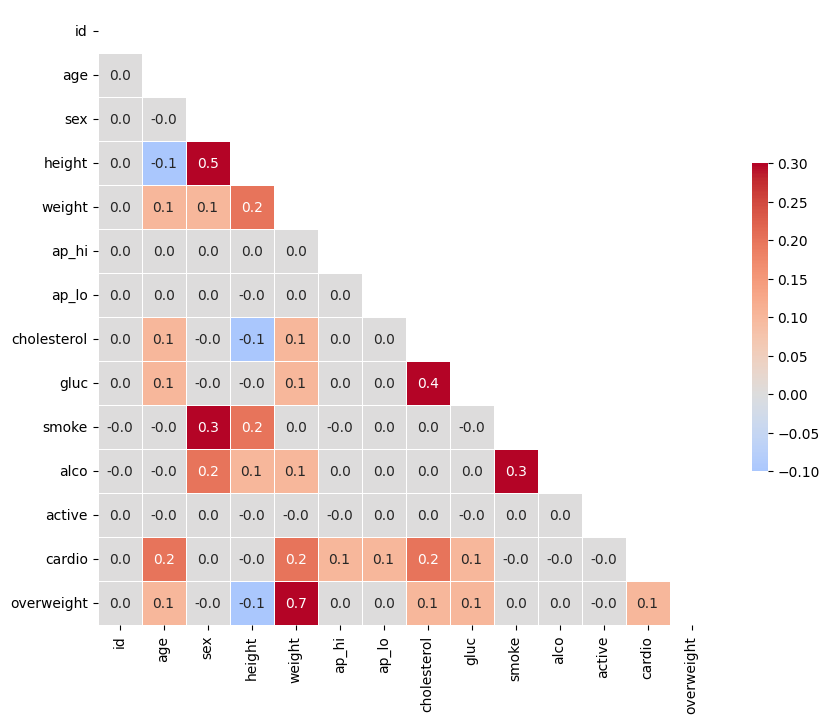

In [56]:
corr = df_heat.corr().round(1)

# 13
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))

# Plotar a matriz de correlação com um heatmap usando seaborn
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig, ax = plt.gcf(), plt.gca()